In [1]:
#connect to drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import json
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import glob
import os

path = '/content/drive/MyDrive/senior_thesis/MT_Bench/final_outputs'

dfs = {}
for filename in os.listdir(path):
  if filename.endswith('.csv'):
    file_path = os.path.join(path, filename)

    df = pd.read_csv(file_path)
    print(df)
    filename = filename[:-4]
    # df['id'] = df['id'].astype(int)
    df['correct'] = df['correct'].astype(str).str.strip()
    df['correct'] = df['correct'].str.replace('True', '1')
    df['correct'] = df['correct'].str.replace('False', '0')
    df['correct'] = df['correct'].astype(int)
    dfs[filename] = df.copy()

      id                                              input  \
0      0  Explain what's base rate fallacy and list five...   
1      1             x+y = 4z, x*y = 4z^2, express x-y in z   
2      2  Please describe the concept of machine learnin...   
3      3  Suggest five award-winning documentary films w...   
4      4  Benjamin went to a bookstore and purchased a v...   
..   ...                                                ...   
185  194  Act as a math teacher. I will provide some mat...   
186  195  Now you are a machine learning engineer. Your ...   
187  196  Embrace the role of Sheldon from "The Big Bang...   
188  197  Here is a Python function to find the length o...   
189  198  Embody the persona of Tony Stark from “Iron Ma...   

                                              output_1  \
0    Base rate fallacy, also known as base rate neg...   
1                                            x-y = -2z   
2    Machine learning is a subfield of artificial i...   
3    Here a

In [4]:
dfs.keys()

dict_keys(['gemma-1.1-2b-it', 'gemma-2-2b-it', 'llama-3-8b-it', 'llama-3.2-1b-it', 'llama-3.2-3b-it', 'mistral-7b-it-v0.1', 'mistral-7b-it-v0.3', 'mistral-8b-it-2410', 'olmo-7b-it', 'olmoe-1b-7b-0924-it', 'olmo-2-0325-32b-it', 'phi-3-medium-4k-it', 'phi-3.5-mini-it', 'phi-4-mini-it', 'qwen-2.5-0.5b-it', 'qwen-2.5-1.5b-it', 'qwen-2.5-3b-it', 'qwen-2.5-7b-it-1m', 'qwen-2.5-7b-it', 'flan-t5-base', 'flan-t5-large', 'flan-t5-small', 'flan-t5-xl'])

In [5]:
dfs['phi-3.5-mini-it']

,id,input,output_1,output_2,correct
0,0,Explain what's base rate fallacy and list five...,"Base rate fallacy, also known as base rate neg...",Base rate fallacy is a cognitive bias that occ...,1
1,1,"x+y = 4z, x*y = 4z^2, express x-y in z",x-y = -2z,We can start by using the formula for (x+y)^2:...,1
2,2,Please describe the concept of machine learnin...,Machine learning is a subfield of artificial i...,Machine learning is a type of artificial intel...,1
3,3,Suggest five award-winning documentary films w...,Here are five award-winning documentary films ...,1. The Cove (2009): This Academy Award-winning...,1
4,4,Benjamin went to a bookstore and purchased a v...,The cost of 5 copies of the sci-fi novel is 5 ...,* 5 sci-fi novels at $20 each = 5 * $20 = $100...,1
...,...,...,...,...,...
194,194,Act as a math teacher. I will provide some mat...,Sure! Probability is the study of how likely e...,Sure! Probability is a measure of how likely a...,1
195,195,Now you are a machine learning engineer. Your ...,A language model is a statistical model that i...,Here is a simplified explanation of language m...,1
196,196,"Embrace the role of Sheldon from ""The Big Bang...","As Sheldon, I am a staunch proponent of hand d...","Well, based on my personal experience and scie...",1
197,197,Here is a Python function to find the length o...,The function seems correct and there is no bug...,Good catch! There is indeed a bug in this func...,0


In [6]:
ground_truth = pd.read_csv('/content/drive/MyDrive/senior_thesis/MT_Bench/mtbench_ground_truth.csv')
ground_truth.head()

,Unnamed: 0,input,output_1,output_2,label,id
0,0,Explain what's base rate fallacy and list five...,"Base rate fallacy, also known as base rate neg...",Base rate fallacy is a cognitive bias that occ...,1,0
1,1,"x+y = 4z, x*y = 4z^2, express x-y in z",x-y = -2z,We can start by using the formula for (x+y)^2:...,2,1
2,2,Please describe the concept of machine learnin...,Machine learning is a subfield of artificial i...,Machine learning is a type of artificial intel...,1,2
3,3,Suggest five award-winning documentary films w...,Here are five award-winning documentary films ...,1. The Cove (2009): This Academy Award-winning...,1,3
4,4,Benjamin went to a bookstore and purchased a v...,The cost of 5 copies of the sci-fi novel is 5 ...,* 5 sci-fi novels at $20 each = 5 * $20 = $100...,2,4


In [7]:
result = ground_truth.copy()
result = result[['id']]
for i, df in dfs.items():
    df_renamed = df.rename(columns={'correct': f'{i}'})

    df_renamed = df_renamed[['id', f'{i}']]

    result = result.merge(df_renamed, on='id', how='inner')


In [8]:
result= result.dropna()
result

,id,gemma-1.1-2b-it,gemma-2-2b-it,llama-3-8b-it,llama-3.2-1b-it,llama-3.2-3b-it,mistral-7b-it-v0.1,mistral-7b-it-v0.3,mistral-8b-it-2410,olmo-7b-it,...,phi-4-mini-it,qwen-2.5-0.5b-it,qwen-2.5-1.5b-it,qwen-2.5-3b-it,qwen-2.5-7b-it-1m,qwen-2.5-7b-it,flan-t5-base,flan-t5-large,flan-t5-small,flan-t5-xl
0,2,0,0,1,0,1,1,1,1,1,...,1,0,0,0,1,1,1,0,1,1
1,4,0,1,1,0,1,0,1,0,1,...,0,0,1,1,0,0,0,1,0,1
2,6,1,0,1,0,1,0,0,1,1,...,1,0,1,1,1,1,0,1,0,1
3,7,1,1,1,1,1,1,1,1,0,...,1,0,0,1,1,1,1,0,1,0
4,8,1,1,1,1,0,1,1,1,0,...,1,0,1,1,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,193,1,1,1,1,1,1,1,1,0,...,1,0,0,1,1,1,1,0,1,1
143,194,0,0,0,0,0,0,0,0,1,...,0,1,0,1,1,0,0,0,0,0
144,196,0,0,1,0,0,0,1,0,0,...,0,0,1,1,1,1,0,0,0,0
145,197,1,1,0,0,0,1,0,0,0,...,1,0,1,0,1,0,1,0,1,0


In [9]:
result.to_csv('mtbench_results.csv')

Model Accuracies (%):
                  Model   Accuracy
0     qwen-2.5-7b-it-1m  75.510204
1    phi-3-medium-4k-it  74.149660
2    olmo-2-0325-32b-it  72.789116
3        qwen-2.5-7b-it  72.108844
4         llama-3-8b-it  71.428571
5        qwen-2.5-3b-it  71.428571
6       phi-3.5-mini-it  71.428571
7      qwen-2.5-1.5b-it  68.027211
8       llama-3.2-3b-it  68.027211
9    mistral-8b-it-2410  66.666667
10   mistral-7b-it-v0.3  65.986395
11           flan-t5-xl  64.625850
12      gemma-1.1-2b-it  59.183673
13        phi-4-mini-it  57.823129
14        gemma-2-2b-it  54.421769
15           olmo-7b-it  53.061224
16   mistral-7b-it-v0.1  51.700680
17        flan-t5-large  51.700680
18         flan-t5-base  50.340136
19        flan-t5-small  50.340136
20  olmoe-1b-7b-0924-it  49.659864
21      llama-3.2-1b-it  47.619048
22     qwen-2.5-0.5b-it  46.938776


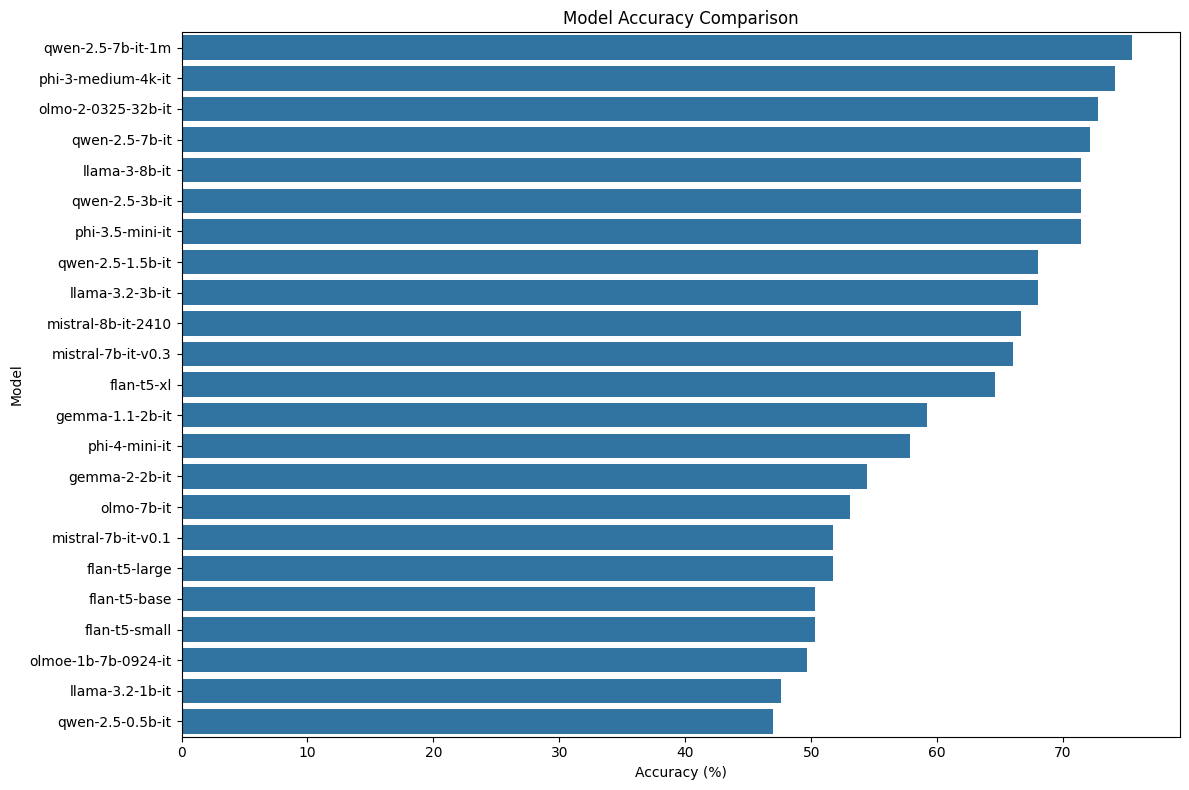


Total number of examples: 147

Best performing model: qwen-2.5-7b-it-1m with accuracy 75.51%
Worst performing model: qwen-2.5-0.5b-it with accuracy 46.94%


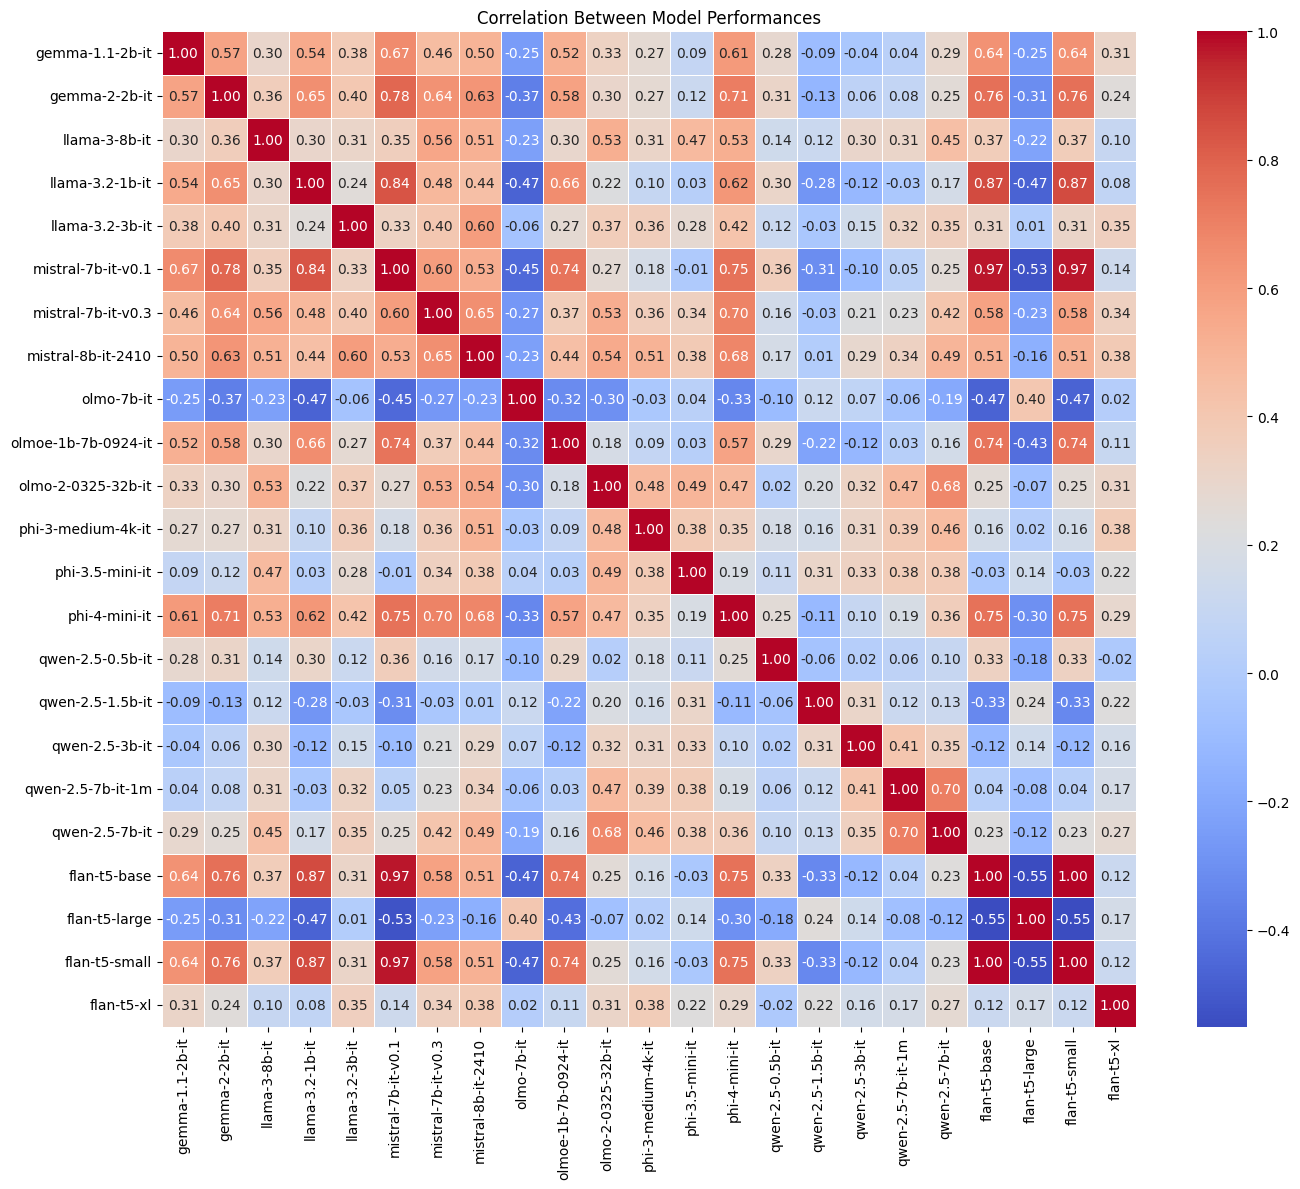

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('mtbench_results.csv')

# List of model columns (excluding non-model columns)
model_columns = [col for col in df.columns if col not in ['Unnamed: 0', 'id', 'input', 'output_1', 'output_2', 'label']]

# Calculate accuracy for each model
accuracies = {}
for model in model_columns:
    # Calculate accuracy (assuming 1 is correct and 0 is incorrect)
    accuracy = df[model].mean() * 100  # Convert to percentage
    accuracies[model] = accuracy

# Create a dataframe with the accuracies
accuracy_df = pd.DataFrame(list(accuracies.items()), columns=['Model', 'Accuracy'])
accuracy_df = accuracy_df.sort_values('Accuracy', ascending=False).reset_index(drop=True)

# Display the accuracies
print("Model Accuracies (%):")
print(accuracy_df)
accuracy_df.to_csv('mtbench_model_accuracies.csv')

# Create a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Accuracy', y='Model', data=accuracy_df)
plt.title('Model Accuracy Comparison')
plt.xlabel('Accuracy (%)')
plt.ylabel('Model')
plt.tight_layout()
plt.savefig('model_accuracies.png')
plt.show()

# Calculate additional statistics
total_examples = len(df)
print(f"\nTotal number of examples: {total_examples}")

# Get the best and worst performing models
best_model = accuracy_df.iloc[0]
worst_model = accuracy_df.iloc[-1]

print(f"\nBest performing model: {best_model['Model']} with accuracy {best_model['Accuracy']:.2f}%")
print(f"Worst performing model: {worst_model['Model']} with accuracy {worst_model['Accuracy']:.2f}%")

# Calculate correlation between model performances
correlation_matrix = df[model_columns].corr()
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Correlation Between Model Performances')
plt.tight_layout()
plt.savefig('model_correlations.png')
plt.show()


In [11]:
formatted_data = result.copy()
formatted_data = formatted_data.drop(columns=['id'])
formatted_data.head()

,gemma-1.1-2b-it,gemma-2-2b-it,llama-3-8b-it,llama-3.2-1b-it,llama-3.2-3b-it,mistral-7b-it-v0.1,mistral-7b-it-v0.3,mistral-8b-it-2410,olmo-7b-it,olmoe-1b-7b-0924-it,...,phi-4-mini-it,qwen-2.5-0.5b-it,qwen-2.5-1.5b-it,qwen-2.5-3b-it,qwen-2.5-7b-it-1m,qwen-2.5-7b-it,flan-t5-base,flan-t5-large,flan-t5-small,flan-t5-xl
0,0,0,1,0,1,1,1,1,1,1,...,1,0,0,0,1,1,1,0,1,1
1,0,1,1,0,1,0,1,0,1,0,...,0,0,1,1,0,0,0,1,0,1
2,1,0,1,0,1,0,0,1,1,1,...,1,0,1,1,1,1,0,1,0,1
3,1,1,1,1,1,1,1,1,0,1,...,1,0,0,1,1,1,1,0,1,0
4,1,1,1,1,0,1,1,1,0,1,...,1,0,1,1,1,1,1,0,1,1


In [12]:
model_names = formatted_data.columns.tolist()
formatted_data = formatted_data.to_numpy()

results = {}
for model_name in model_names:
    results[model_name] = {"subject_id": model_name, "responses": {}}

for i in range(formatted_data.shape[0]):
    question_id = f"q{i+1}"

    for j, model_name in enumerate(model_names):
        results[model_name]["responses"][question_id] = int(formatted_data[i, j])

jsonl_output = "\n".join([json.dumps(results[model]) for model in model_names])

with open("formatted_data.jsonl", "w") as f:
    f.write(jsonl_output)

## final try of irt

In [13]:
!pip install pandas pyro-ppl py-irt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 77.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 70.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 42.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 57.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [14]:
!py-irt train 1pl formatted_data.jsonl output/output_1pl --epochs 3000 --priors vague

[01:50:05] config: model_type='1pl' epochs=3000 priors='vague' initializers=[] dims=None  ]8;id=740755;file:///usr/local/lib/python3.11/dist-packages/py_irt/cli.py\cli.py]8;;\:]8;id=674542;file:///usr/local/lib/python3.11/dist-packages/py_irt/cli.py#109\109]8;;\
           lr=0.1 lr_decay=0.9999 dropout=0.5 hidden=100 vocab_size=None log_every=100              
           seed=None deterministic=False                                                            
           data_path: formatted_data.jsonl                                                ]8;id=89546;file:///usr/local/lib/python3.11/dist-packages/py_irt/cli.py\cli.py]8;;\:]8;id=546704;file:///usr/local/lib/python3.11/dist-packages/py_irt/cli.py#111\111]8;;\
           output directory: output/output_1pl                                            ]8;id=37492;file:///usr/local/lib/python3.11/dist-packages/py_irt/cli.py\cli.py]8;;\:]8;id=178761;file:///usr/local/lib/python3.11/dist-packages/py_irt/cli.py#112

In [15]:
with open ("output/output_1pl/best_parameters.json","r") as file:
    results = json.load(file)
results.keys()

dict_keys(['ability', 'diff', 'irt_model', 'item_ids', 'subject_ids'])

In [16]:
len(results["diff"])

147

In [17]:
results['subject_ids']

{'0': 'gemma-1.1-2b-it',
 '1': 'gemma-2-2b-it',
 '2': 'llama-3-8b-it',
 '3': 'llama-3.2-1b-it',
 '4': 'llama-3.2-3b-it',
 '5': 'mistral-7b-it-v0.1',
 '6': 'mistral-7b-it-v0.3',
 '7': 'mistral-8b-it-2410',
 '8': 'olmo-7b-it',
 '9': 'olmoe-1b-7b-0924-it',
 '10': 'olmo-2-0325-32b-it',
 '11': 'phi-3-medium-4k-it',
 '12': 'phi-3.5-mini-it',
 '13': 'phi-4-mini-it',
 '14': 'qwen-2.5-0.5b-it',
 '15': 'qwen-2.5-1.5b-it',
 '16': 'qwen-2.5-3b-it',
 '17': 'qwen-2.5-7b-it-1m',
 '18': 'qwen-2.5-7b-it',
 '19': 'flan-t5-base',
 '20': 'flan-t5-large',
 '21': 'flan-t5-small',
 '22': 'flan-t5-xl'}

In [18]:
items = pd.DataFrame(
    index=results["item_ids"],
    data= results["diff"],
    columns=["diff"]
)
items.head()

,diff
0,-0.992486
1,-0.053148
2,-1.103787
3,-1.464882
4,-2.189367


In [19]:

df = pd.DataFrame.from_dict(results['subject_ids'], orient="index", columns=["models"])
df.index = df.index.astype(int)

df.head()

,models
0,gemma-1.1-2b-it
1,gemma-2-2b-it
2,llama-3-8b-it
3,llama-3.2-1b-it
4,llama-3.2-3b-it


In [20]:
subjects = pd.DataFrame(
    index=results["subject_ids"],
    data= results["ability"],
    columns=["ability_1pl"]
)
subjects.set_index(df.index, inplace=True)
subjects = pd.merge(subjects, df, left_index = True, right_index = True)
subjects.head()

,ability_1pl,models
0,-0.159788,gemma-1.1-2b-it
1,-0.582023,gemma-2-2b-it
2,0.432789,llama-3-8b-it
3,-0.875516,llama-3.2-1b-it
4,0.253254,llama-3.2-3b-it


## Comparing to benchmarks?

In [21]:
#df for abilities from output
thetas = pd.DataFrame({"Model": subjects['models'], "Theta": subjects['ability_1pl']})
thetas



,Model,Theta
0,gemma-1.1-2b-it,-0.159788
1,gemma-2-2b-it,-0.582023
2,llama-3-8b-it,0.432789
3,llama-3.2-1b-it,-0.875516
4,llama-3.2-3b-it,0.253254
5,mistral-7b-it-v0.1,-0.634830
6,mistral-7b-it-v0.3,0.235371
7,mistral-8b-it-2410,0.216823
8,olmo-7b-it,-0.512262
9,olmoe-1b-7b-0924-it,-0.654763


In [22]:
benchmarks = pd.read_csv("https://docs.google.com/spreadsheets/d/19HOb-W2Be8eSU0Lw3eQODyuLxZd1ropEUmr23xJhYCE/export?format=csv")
benchmarks



,Model,IFEval,Big_Bench_Hard,MuSR
0,flant-5-large,22.01,17.51,9.01
1,flant-5-xl,22.37,22.70,11.33
2,flan-t5-base,18.91,11.34,3.22
3,flan-t5-small,15.24,6.36,10.37
4,gemma-1.1-2b-it,30.67,5.86,2.02
5,gemma-2-2b-it,56.68,17.98,7.08
6,llama-3-8b-it,74.08,28.24,1.60
7,llama-3.2-1b-it,56.98,8.74,2.97
8,llama-3.2-3b-it,73.93,24.06,1.37
9,mistral-7b-it-v0.1,44.87,7.65,6.13


In [23]:
stats = pd.merge(benchmarks, thetas, on='Model')
stats

,Model,IFEval,Big_Bench_Hard,MuSR,Theta
0,flan-t5-base,18.91,11.34,3.22,-0.752828
1,flan-t5-small,15.24,6.36,10.37,-0.834169
2,gemma-1.1-2b-it,30.67,5.86,2.02,-0.159788
3,gemma-2-2b-it,56.68,17.98,7.08,-0.582023
4,llama-3-8b-it,74.08,28.24,1.60,0.432789
5,llama-3.2-1b-it,56.98,8.74,2.97,-0.875516
6,llama-3.2-3b-it,73.93,24.06,1.37,0.253254
7,mistral-7b-it-v0.1,44.87,7.65,6.13,-0.634830
8,mistral-7b-it-v0.3,54.65,25.57,4.30,0.235371
9,mistral-8b-it-2410,58.96,25.82,10.72,0.216823


In [24]:
stats.to_csv('thetas_mtbench.csv')

In [25]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler_minmax = MinMaxScaler()
stats_minmax = stats.copy()
stats_minmax[["IFEval", "Big_Bench_Hard", "MuSR", "Theta"]] = scaler_minmax.fit_transform(stats[["IFEval", "Big_Bench_Hard", "MuSR", "Theta"]])

# # should z score instead maybe??? Idk girl
# scaler_std = StandardScaler()
# stats_std = stats.copy()
# stats_std[["IFEval", "Big Bench Hard", "MuSR", "Theta"]] = scaler_std.fit_transform(stats[["IFEval", "Big Bench Hard", "MuSR", "Theta"]])

print(stats_minmax.head())
# print(stats_std.head())


             Model    IFEval  Big_Bench_Hard      MuSR     Theta
0     flan-t5-base  0.060551        0.125919  0.188274  0.067550
1    flan-t5-small  0.000000        0.011489  0.778695  0.022765
2  gemma-1.1-2b-it  0.254578        0.000000  0.089182  0.394064
3    gemma-2-2b-it  0.683716        0.278493  0.507019  0.161591
4    llama-3-8b-it  0.970797        0.514246  0.054500  0.720325


In [26]:
def get_theta_info(stats):

  from scipy.stats import spearmanr

  correlations = {col: spearmanr(stats["Theta"], stats[col])[0] for col in ["IFEval", "Big_Bench_Hard", "MuSR"]}
  print("Spearman Correlations with Theta:", correlations)

    #explained variance
  from sklearn.linear_model import LinearRegression
  X = stats[["IFEval", "Big_Bench_Hard", "MuSR"]]
  y = stats["Theta"]
  reg = LinearRegression().fit(X, y)
  r_squared = reg.score(X, y)
  print("R² of Theta predicting benchmarks:", r_squared)

In [27]:
get_theta_info(stats_minmax)

Spearman Correlations with Theta: {'IFEval': np.float64(0.7272727272727273), 'Big_Bench_Hard': np.float64(0.7714285714285715), 'MuSR': np.float64(0.38051948051948054)}
R² of Theta predicting benchmarks: 0.6705955822545298


In [28]:
get_theta_info(stats)

Spearman Correlations with Theta: {'IFEval': np.float64(0.7272727272727273), 'Big_Bench_Hard': np.float64(0.7714285714285715), 'MuSR': np.float64(0.38051948051948054)}
R² of Theta predicting benchmarks: 0.6705955822545298


In [29]:
!py-irt train 2pl formatted_data.jsonl output/output_2pl --epochs 3000

[01:50:56] config: model_type='2pl' epochs=3000 priors=None initializers=[] dims=None     ]8;id=84581;file:///usr/local/lib/python3.11/dist-packages/py_irt/cli.py\cli.py]8;;\:]8;id=600663;file:///usr/local/lib/python3.11/dist-packages/py_irt/cli.py#109\109]8;;\
           lr=0.1 lr_decay=0.9999 dropout=0.5 hidden=100 vocab_size=None log_every=100              
           seed=None deterministic=False                                                            
           data_path: formatted_data.jsonl                                                ]8;id=166705;file:///usr/local/lib/python3.11/dist-packages/py_irt/cli.py\cli.py]8;;\:]8;id=218418;file:///usr/local/lib/python3.11/dist-packages/py_irt/cli.py#111\111]8;;\
           output directory: output/output_2pl                                            ]8;id=583309;file:///usr/local/lib/python3.11/dist-packages/py_irt/cli.py\cli.py]8;;\:]8;id=927509;file:///usr/local/lib/python3.11/dist-packages/py_irt/cli.py#11

In [30]:
with open ("output/output_2pl/best_parameters.json","r") as file:
    results_2 = json.load(file)
results_2.keys()

dict_keys(['ability', 'diff', 'disc', 'irt_model', 'item_ids', 'subject_ids'])

In [31]:
items_2 = pd.DataFrame(
    index=results_2["item_ids"],
    data= results_2["diff"],
    columns=["diff"]
)
items_2['disc'] = results_2['disc']
items_2.head()

,diff,disc
0,-0.000640,0.120081
1,0.001320,0.003917
2,0.003073,0.077440
3,-0.017510,0.178706
4,0.021142,0.173475


In [32]:
result = result.reset_index(drop=True)
items_2 = items_2.reset_index(drop=True)

if len(result) == len(items_2):
    items_2['id'] = result['id'].values
items_2

,diff,disc,id
0,-0.000640,0.120081,2
1,0.001320,0.003917,4
2,0.003073,0.077440,6
3,-0.017510,0.178706,7
4,0.021142,0.173475,8
...,...,...,...
142,0.011688,0.157420,193
143,0.107141,0.001124,194
144,0.017764,0.006340,196
145,0.019887,0.004389,197


In [33]:
items_2.to_csv('mtbench_items.csv')

In [34]:

df_2 = pd.DataFrame.from_dict(results_2['subject_ids'], orient="index", columns=["models"])
df_2.index = df_2.index.astype(int)

df_2.head()

,models
0,gemma-1.1-2b-it
1,gemma-2-2b-it
2,llama-3-8b-it
3,llama-3.2-1b-it
4,llama-3.2-3b-it


In [35]:
subjects_2 = pd.DataFrame(
    index=results_2["subject_ids"],
    data= results_2["ability"],
    columns=["ability_2pl"]
)
subjects_2.set_index(df_2.index, inplace=True)
subjects_2 = pd.merge(subjects_2, df_2, left_index = True, right_index = True)
subjects_2.head()

,ability_2pl,models
0,2.905565,gemma-1.1-2b-it
1,2.823538,gemma-2-2b-it
2,3.180539,llama-3-8b-it
3,2.197716,llama-3.2-1b-it
4,2.477594,llama-3.2-3b-it


In [36]:
#df for abilities from output
thetas_2 = pd.DataFrame({"Model": subjects_2['models'], "Theta_2pl": subjects_2['ability_2pl']})
thetas_2



,Model,Theta_2pl
0,gemma-1.1-2b-it,2.905565
1,gemma-2-2b-it,2.823538
2,llama-3-8b-it,3.180539
3,llama-3.2-1b-it,2.197716
4,llama-3.2-3b-it,2.477594
5,mistral-7b-it-v0.1,2.892410
6,mistral-7b-it-v0.3,3.618472
7,mistral-8b-it-2410,3.248168
8,olmo-7b-it,-1.150789
9,olmoe-1b-7b-0924-it,2.066665


In [37]:
stats_2 = pd.merge(benchmarks, thetas_2, on='Model')
stats_2

,Model,IFEval,Big_Bench_Hard,MuSR,Theta_2pl
0,flan-t5-base,18.91,11.34,3.22,2.834491
1,flan-t5-small,15.24,6.36,10.37,2.736596
2,gemma-1.1-2b-it,30.67,5.86,2.02,2.905565
3,gemma-2-2b-it,56.68,17.98,7.08,2.823538
4,llama-3-8b-it,74.08,28.24,1.60,3.180539
5,llama-3.2-1b-it,56.98,8.74,2.97,2.197716
6,llama-3.2-3b-it,73.93,24.06,1.37,2.477594
7,mistral-7b-it-v0.1,44.87,7.65,6.13,2.892410
8,mistral-7b-it-v0.3,54.65,25.57,4.30,3.618472
9,mistral-8b-it-2410,58.96,25.82,10.72,3.248168


In [38]:
get_theta_info(stats_2)

KeyError: 'Theta'

In [39]:
mt_thetas = thetas.merge(thetas_2, on='Model')
mt_thetas

,Model,Theta,Theta_2pl
0,gemma-1.1-2b-it,-0.159788,2.905565
1,gemma-2-2b-it,-0.582023,2.823538
2,llama-3-8b-it,0.432789,3.180539
3,llama-3.2-1b-it,-0.875516,2.197716
4,llama-3.2-3b-it,0.253254,2.477594
5,mistral-7b-it-v0.1,-0.634830,2.892410
6,mistral-7b-it-v0.3,0.235371,3.618472
7,mistral-8b-it-2410,0.216823,3.248168
8,olmo-7b-it,-0.512262,-1.150789
9,olmoe-1b-7b-0924-it,-0.654763,2.066665


In [41]:
mt_thetas.to_csv('mtbench_thetas.csv')